<a href="https://colab.research.google.com/github/7673502/food-pantry/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install dependencies
!pip install seaborn
!pip install matplotlib
!pip install mastml
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install tabulate

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_excel("https://github.com/7673502/food-pantry/raw/refs/heads/main/Skunkworks_Theriver_raw_v1.xlsx")
df

,Date,Amount,Type,Fund,Campaign,Appeal,Primary ZIP Code,Account Number
0,2024-09-25,0.00,Donation,Unrestricted,In-Kind,Individual Multi Channel,NaN,338
1,2024-09-25,300.00,Donation,Unrestricted,Support The River,Individual Online,53704-1021,2574
2,2024-09-25,25.81,Recurring Donation Payment,Unrestricted,Support The River,Individual Online,53590-3843,2692
3,2024-09-24,0.00,Donation,Unrestricted,In-Kind,Business Multi Channel,NaN,20749
4,2024-09-24,100.00,Donation,Unrestricted,Support The River,Individual Multi Channel,53703-2599,310
...,...,...,...,...,...,...,...,...
11484,2023-01-01,108.15,Donation,Unrestricted,Year-End 2022,Year-End Appeal Mailing 2022,53590-9246,244
11485,2023-01-01,103.00,Donation,Unrestricted,Support The River,Individual Online,53718-3180,84
11486,2023-01-01,103.00,Donation,Unrestricted,Support The River,Individual Online,53711-1156,4540
11487,2023-01-01,1030.00,Donation,Unrestricted,Support The River,Individual Online,53718-8249,1069


In [ ]:
# statistics at a glance
print(f"Mean Donation: ${df['Amount'].mean()}")
print(f"Median Donation: ${df['Amount'].median()}")
print(f"Mode Donation: ${df['Amount'].mode().loc[0]}")
print(f"Standard Deviation of Donation: ${df['Amount'].std()}")
print(f"Range of Donations: ${df['Amount'].max() - df['Amount'].min()}")

Mean Donation: $1903.4027652537206
Median Donation: $60.0
Mode Donation: $100.0
Standard Deviation of Donation: $38610.16352273237
Range of Donations: $3000000.0


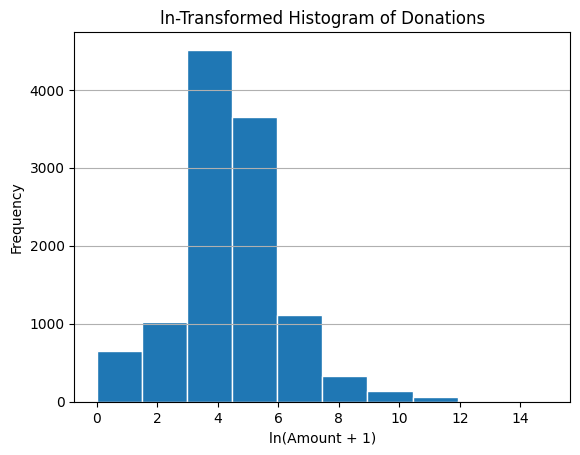

In [ ]:
plt.hist(np.log(df['Amount']+1), bins=10, edgecolor="white")
plt.title('ln-Transformed Histogram of Donations')
plt.xlabel('ln(Amount + 1)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

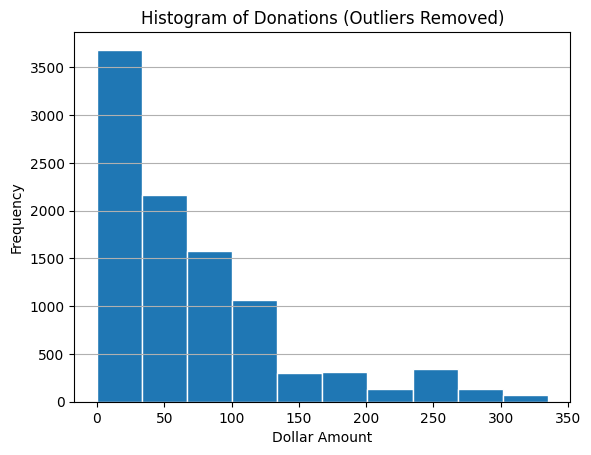

In [ ]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
df_filtered_outliers = df[(df['Amount'] >= (Q1 - 1.5 * IQR)) & (df['Amount'] <= (Q3 + 1.5 * IQR))]

plt.hist(df_filtered_outliers['Amount'], bins=10, edgecolor="white")
plt.title('Histogram of Donations (Outliers Removed)')
plt.xlabel('Dollar Amount')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()